# __MRI DETECTION__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

## __AUXILLIARY FUNCTIONS__

In [22]:
from sklearn.impute import KNNImputer

def read_and_drop(csv,features=[],dropp=False):
    df = pd.read_csv(csv)
    imputer = KNNImputer(n_neighbors=5)
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    if dropp: 
        df = df.drop(features, axis='columns')
    return df

This function is an auxilliary function that we can use whenver we want to retrieve the dataset, it directly imputes Nan's in each dataset it is passed not through the mean, mode or median but through a more robust way trying to capture a bit more variance. It uses KNN with 5 neighbors to try to assign Nan values as close as possible to their original true value

## __EDA__

In [14]:
X = read_and_drop('X_train.csv','id',True)
y = read_and_drop('y_train.csv','id',True)

In [15]:
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,14168.823171,10514.380717,3316.149698,94230.695124,102.386606,92.677127,11108.748199,10866.505510,10837.622093,10.227734,...,9891.466349,12352.094085,846.014651,105.132144,102.112809,2090.004260,2.691845,1234.374109,1000.784475,9285.751272
1,17757.037554,10955.039157,4101.016273,92959.527633,103.292507,99.855168,10013.959449,10826.607494,10076.101597,11.436970,...,9535.731468,16198.071494,776.084467,106.385590,103.472030,2474.051881,2.287976,1296.028903,1012.626705,11750.284764
2,14226.656663,11029.642499,3202.618739,124055.600561,100.542483,92.860892,10714.240794,10492.342868,10372.810913,10.810076,...,10329.704431,13976.063780,737.040332,103.671234,109.458246,2656.083281,2.843706,888.353607,1048.810385,9553.922728
3,8766.012436,7384.202998,2147.308418,100157.719990,104.855061,101.929026,10050.049932,10499.521099,10525.030989,10.092109,...,10008.251395,6212.127347,329.044233,105.084488,104.858546,1097.785204,2.732257,927.752967,1048.357330,9618.936420
4,13801.016418,13269.493652,3408.316953,92048.527786,103.759758,95.789235,9667.353978,10750.783106,10618.800750,12.006773,...,10095.782015,13772.061493,861.058909,103.875792,100.369834,2693.053231,2.702908,1471.354073,1071.284484,9423.533063


In [16]:
y.head()

,y
0,74.0
1,51.0
2,70.0
3,52.0
4,85.0


NaN values have to be handled, a good way might be to use: 
-   Mean
-   Mode
-   Median
-   KNN imputation

In [17]:
X.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,15185.535864,10939.687224,3418.879561,99873.151320,105.032701,99.987217,10010.400701,10503.460640,10484.921165,10.032247,...,10052.471165,13259.107995,816.714211,104.916252,105.156990,2487.985174,2.713377,1361.381100,1051.650068,9948.466286
std,2234.222590,1519.861717,430.180240,9373.772088,2.755162,9.269597,949.008662,269.169123,282.721381,0.976156,...,932.903595,2090.831559,174.525805,2.705585,2.716728,502.033789,0.257177,256.734878,28.385794,985.594596
min,5636.623777,6764.060541,1849.453269,65828.916291,100.056578,70.232469,6797.836298,10000.771287,10000.339782,6.759685,...,7109.997185,4100.700865,164.997735,100.040624,100.015930,750.038434,1.590647,663.173673,1000.067137,6383.771227
25%,13931.809724,9926.530547,3159.756837,94134.675837,102.811093,94.110621,9428.209799,10284.636811,10245.766018,9.374595,...,9462.140789,12076.791406,701.037484,102.841616,102.902380,2181.823042,2.534423,1193.950910,1030.447895,9318.992896
50%,14925.676526,10819.674465,3374.271218,99693.177679,104.943102,99.887272,10049.603176,10520.737759,10469.756420,10.078840,...,10009.268843,13098.424059,808.064992,104.768625,105.350679,2480.373100,2.690807,1363.497083,1050.736858,9893.783836
75%,16489.628769,11766.297044,3668.158481,105554.479111,107.353976,105.428295,10550.835729,10700.871543,10719.386727,10.720836,...,10650.906341,14443.303301,917.070199,107.026496,107.248031,2749.104108,2.868703,1523.007737,1076.167608,10589.347836
max,28273.690135,17777.338221,5622.951648,133145.632257,110.087261,130.142499,13865.848591,11000.062311,10999.403374,13.828922,...,13173.145338,24901.251674,1589.225040,110.072565,110.069056,4904.988601,3.795277,2506.104650,1099.975679,13265.026039


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 832 entries, x0 to x831
dtypes: float64(832)
memory usage: 7.7 MB


In [19]:
X.isnull().sum()
y.isnull().sum()
print(X)
print(y)

                x0            x1           x2             x3          x4  \
0     14168.823171  10514.380717  3316.149698   94230.695124  102.386606   
1     17757.037554  10955.039157  4101.016273   92959.527633  103.292507   
2     14226.656663  11029.642499  3202.618739  124055.600561  100.542483   
3      8766.012436   7384.202998  2147.308418  100157.719990  104.855061   
4     13801.016418  13269.493652  3408.316953   92048.527786  103.759758   
...            ...           ...          ...            ...         ...   
1207  18707.457475  13610.725702  3785.886941  113497.632841  109.526764   
1208  17108.239122  12168.536128  3442.619145   98218.773311  100.468476   
1209  14264.707321   9273.405761  3580.894003  101668.927699  102.620705   
1210  14907.077440  10936.636575  3159.167789  100400.608972  106.622507   
1211  14975.969273  11451.350347  3107.470343  100080.295868  108.040548   

              x5            x6            x7            x8         x9  ...  \
0      92

In [20]:
X.nunique()

x0      1194
x1      1200
x2      1196
x3      1197
x4      1204
        ... 
x827    1196
x828    1192
x829    1212
x830    1204
x831    1209
Length: 832, dtype: int64

## __FEATURE SELECTION__

### __FEATURE SELECTION from SelectFromModel__

In [3]:
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

def tabular_importances(importances):
    # NOTE: simply prints in a nice way the feature importances

    feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
    })

    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    feature_importances.reset_index(drop=True, inplace=True)
    return feature_importances

def select_from_model_thresholded(model,X,y,th=0.35):
    # NOTE: does feature selection based on different threshold choice
    model = model.fit(X, y.values.ravel())
    imps = tabular_importances(model.feature_importances_ )
    print(tabulate(imps, headers='keys', tablefmt='pretty'))


    default_model = SelectFromModel(model, prefit=True)
    lower_threshold_model = SelectFromModel(model,prefit=True,threshold=th)
    half_threshold_model = SelectFromModel(model, prefit=True,threshold=0.5)

    return [default_model,lower_threshold_model,half_threshold_model]

def create_array_per_model(models,X):
    # NOTE: simply get all the supports from each model, find the one that is the longest, create the array of that length, merge the masks
    # NOTE: logically it is simply a union of them so we can use the or operator
    masks = [model.get_support() for model in models]
    # NOTE: masks have all the same size and we are 100% sure about this
    union_mask = np.zeros(len(masks[0]), dtype=bool)
    for mask in masks: 
        union_mask |= mask
    
    # NOTE: now that we merged the whole selected features from the support, the non-selected features will be False so we just have to drop them
    latest_df = X.loc[:, union_mask]

    return latest_df
        

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor

X = read_and_drop('X_train.csv','id', True)
y = read_and_drop('y_train.csv','id', True)

# NOTE: having a dictionary is much more cleaner
model_batch = {
    'ex' : ExtraTreesRegressor(random_state=42),
    'rf' : RandomForestRegressor(random_state=42),
    'ab' : AdaBoostRegressor(random_state=42)
}

# NOTE: the models array has as values other array of the subsequent form :
# [ex_df_model, ex_low_model, ex_half_model]
# [rf_df_model, rf_low_model, rf_half_model]
# [ab_df_model, ab_low_model, ab_half_model]
models = [select_from_model_thresholded(md,X,y,th=0.35) for key,md in model_batch.items()] 
# NOTE: for each model in the model batch we create the union between the three threesholded 
#       models from the selected features of each that is resembled in the subsequent array
#       We end up with a X_final for any model in model_batch
# NOTE: we end up with [df,df,...,df] array of feature selected dataframes
X_fin_ens_arr = [create_array_per_model(model_thresholded,X) for model_thresholded in models] 
for df in X_fin_ens_arr:
    print(df.head())

+-----+---------+------------------------+
|     | Feature |       Importance       |
+-----+---------+------------------------+
|  0  |  x159   |  0.04687698158630543   |
|  1  |  x115   |  0.04208209755088668   |
|  2  |  x458   |   0.0366725832090016   |
|  3  |  x415   |  0.034800420259429116  |
|  4  |  x194   |  0.03072533269126566   |
|  5  |  x507   |  0.03058149055769677   |
|  6  |  x702   |  0.025618392651127874  |
|  7  |  x133   |  0.023806405474247914  |
|  8  |  x485   |  0.021434175302319308  |
|  9  |  x334   |  0.019920386277354374  |
| 10  |  x465   |  0.017806461161696242  |
| 11  |  x641   |  0.014007414797728872  |
| 12  |  x654   | 0.0072049753543628366  |
| 13  |  x479   |  0.006549680087318652  |
| 14  |  x325   |  0.006306387985968104  |
| 15  |  x242   |  0.006281532444103226  |
| 16  |  x742   |  0.005386591510078226  |
| 17  |  x410   |  0.005315731931005846  |
| 18  |  x362   |  0.005091871835596741  |
| 19  |  x306   |  0.004947318346519617  |
| 20  |   x

## __OUTLIER DETECTION__

The model assigns an ‘anomaly score’ to each data point based on the depth of the tree needed to reach that point. This score aggregates the depths obtained from each of the iTrees. An anomaly score of -1 assigns anomalies and 1 to normal points based on the contamination parameter (percentage of anomalies present in the data)

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# NOTE: Auxilliary to use after analysis for last dataset
# NOTE: X_work is meant to be the X we use to work with, a feature selected dataframe
def outlier_cleaning(X_work,y,c):
     # NOTE: scaling for better numerical stability, avoiding magnitude to incide while it shouldn't
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_work)

    # NOTE: contamination is the percentage of total samples that it will find as outliers
    #       i.e X here is 1212 and the 3% is 36.6 so it will find 37 outliers
    isof = IsolationForest(n_estimators=100,contamination=c, random_state=42)
    isof = isof.fit(X_scaled)
    print(isof.get_params())
    outlier_X = isof.predict(X_scaled) 
    
    X_work.loc[:,'outlier'] = (outlier_X).astype(int)
    y.loc[:,'outlier'] = (outlier_X).astype(int)
    counts = X_work['outlier'].value_counts()

    # NOTE: PCA for plotting, 2 components
    pca = PCA(n_components=2, random_state=42)
    X_pca_2d = pca.fit_transform(X_scaled)

    # NOTE: Convert to 0 = inlier False, 1 = outlier True for clarity
    outlier_col = (outlier_X == -1).astype(int)

    # NOTE: return new X and y which have the new column marking 1 if sample is to be kept or -1 otherwise
    # NOTE: return X_pca_2d,outlier_col for plotting
    # NOTE: return counts for counting how many samples have -1 or 1 
    return X_work,y, X_pca_2d,outlier_col, counts

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/606777695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work.loc[:,'outlier'] = (outlier_X).astype(int)


{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/1570913107.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


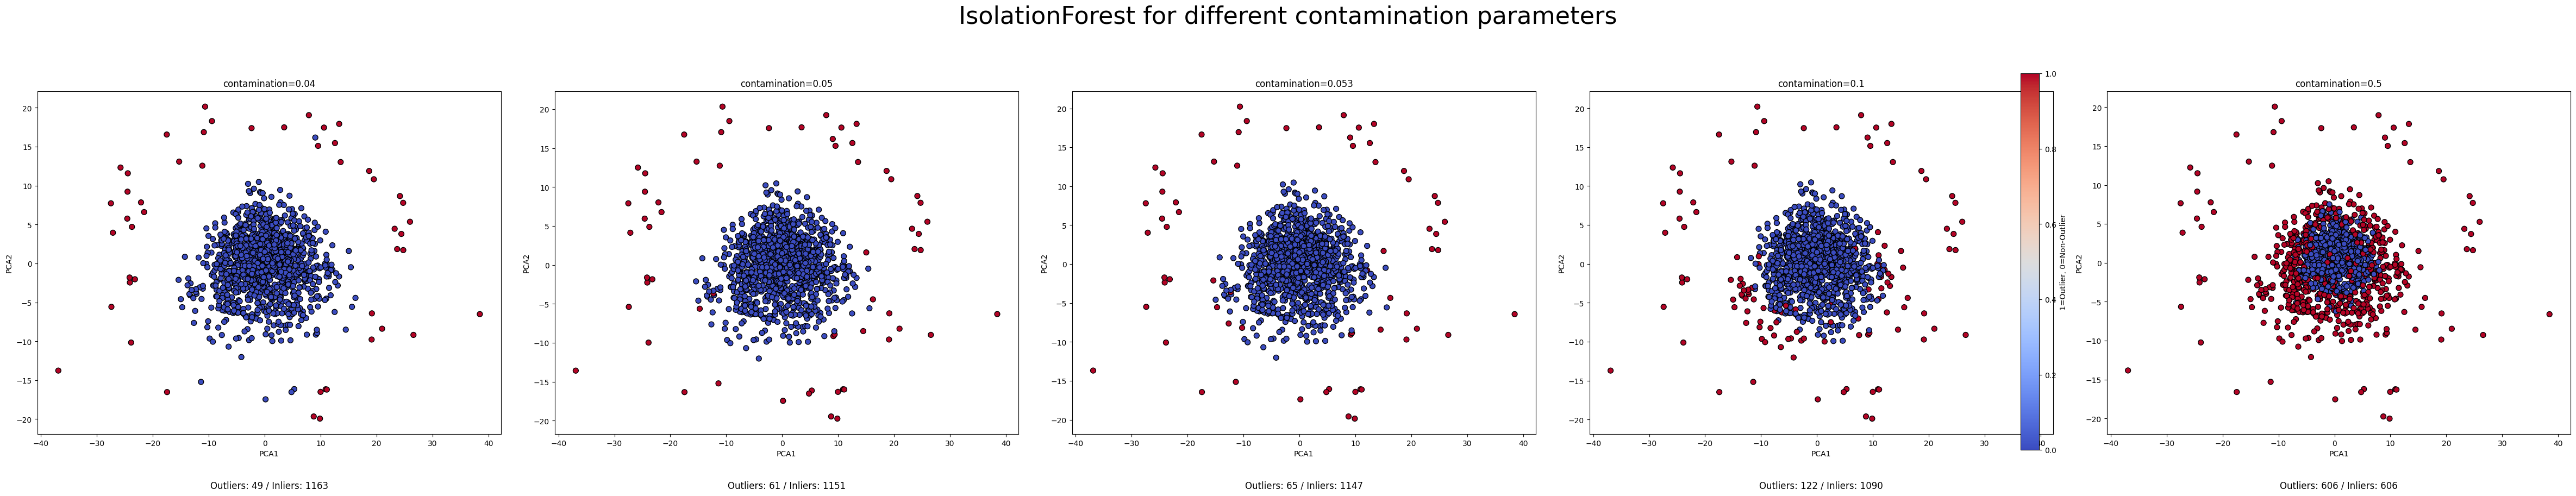

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/606777695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work.loc[:,'outlier'] = (outlier_X).astype(int)


{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/1570913107.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


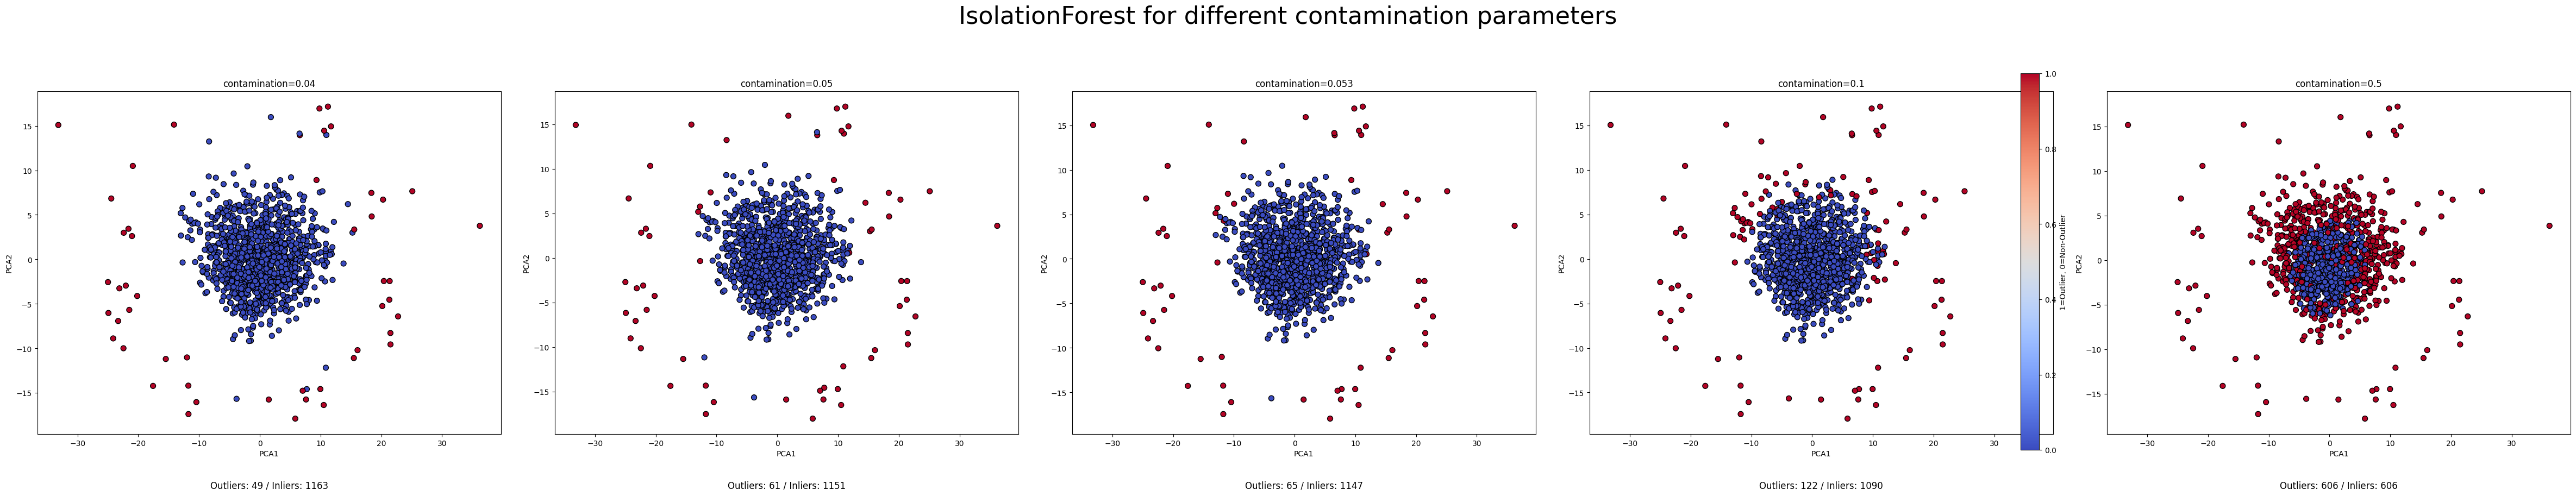

{'bootstrap': False, 'contamination': 0.04, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/606777695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work.loc[:,'outlier'] = (outlier_X).astype(int)


{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


/tmp/ipykernel_102972/1570913107.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


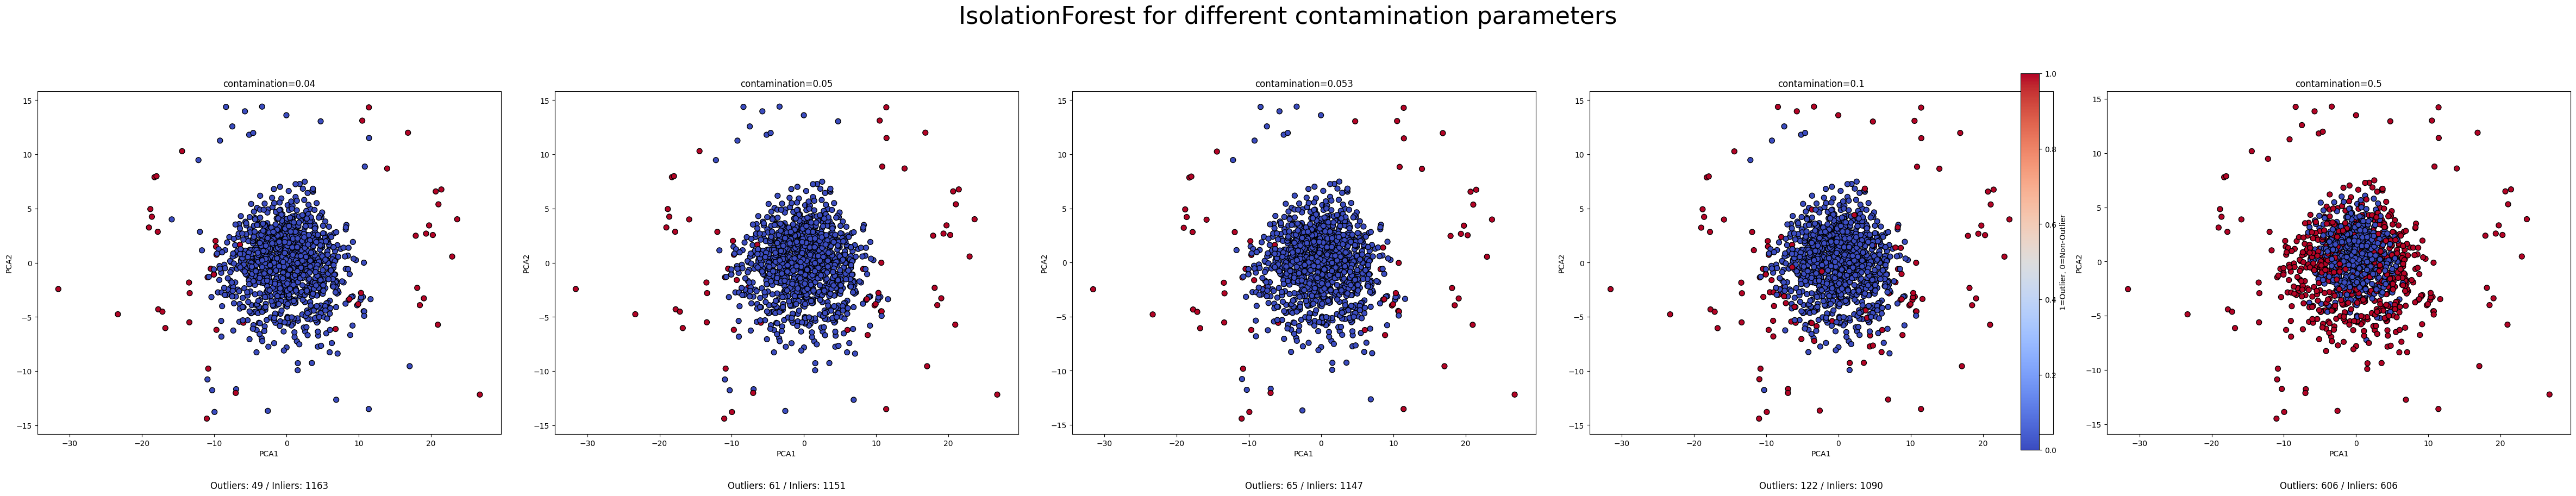

In [6]:

def plots_for_outliers(X_work):
    y = read_and_drop('y_train.csv','id', True)

    cnt = [0.04, 0.05, 0.053, 0.1, 0.5]

    fig, axes = plt.subplots(1, len(cnt), figsize=(9.5*len(cnt), 9)) 

    for i,c in enumerate(cnt):
        _,_, X_pca_2d,outlier_col,counts = outlier_cleaning(X_work,y,c)

        ax = axes[i]  
        scatter = ax.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=outlier_col, cmap='coolwarm', edgecolor='k', s=50)
        ax.set_title(f'contamination={c}')
        ax.set_xlabel('PCA1')
        ax.set_ylabel('PCA2')

        # NOTE: valuye counts returns (unique value, count)
        ax.text(
            0.5, -0.15,  # x, y in axes fraction coordinates
            f"Outliers: {counts.get(-1,0)} / Inliers: {counts.get(1,0)}",
            ha='center', va='center', transform=ax.transAxes, fontsize=12
        )

    fig.colorbar(scatter, ax=axes, orientation='vertical', label='1=Outlier, 0=Non-Outlier')
    fig.suptitle('IsolationForest for different contamination parameters', fontsize=32, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

for x_work in X_fin_ens_arr:
    plots_for_outliers(x_work)

Clearly we can see that the contamination parameter 0.053 is able to neglect all the major outliers, it is removing a a very very small quantity of points close to the inliners buit in order to fully remove the outliers, itr is better to behave like this compared to leave 1 or 2 major outliers and keep 2 or 3 out of 1000+ inliners/

In [ ]:
# NOTE: retrieve outliers, remove them from dataset, prepare dataset for use
# NOTE: param: reduced_data is expecting an pd.dataframe with featured selected columns
def official_datasets(selected_dataframe):
    # X = read_and_drop('X_train.csv','id', True)
    y = read_and_drop('y_train.csv','id', True)
    X_new,y_new,_,_,_ = outlier_cleaning(selected_dataframe,y,0.053)
    X_new = X_new[X_new['outlier'] != -1]
    y_new = y_new[y_new['outlier'] != -1]
    X_official = X_new.drop('outlier', axis='columns')
    y_official = y_new.drop('outlier', axis='columns')
    print(X_official.info())
    print(y_official.info())
    X_official.head()

    return X_official,y_official

## __TRAIN MODELS__

### __RandomForest__

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def train_an_ensemble(model,param_grid,final_dfs):
    for X in final_dfs:
        X_official,y_official = official_datasets(X)

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        pca = PCA(n_components=0.95, random_state=42)
        X_pca = pca.fit_transform(X_scaled)

        explained_variance = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
        plt.axhline(y=0.9, color='r', linestyle='--', label='95% Variance Threshold')
        plt.title('Scree Plot: Explained Variance vs. Number of Components')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.legend()
        plt.show()

        n_components = len(explained_variance)
        print(f"Number of components to retain for 95% variance: {n_components}")

        X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42) 

        grid = GridSearchCV(model(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train.values.ravel())

        rf_best_params = grid.best_params_
        rf = grid.best_estimator_
        r2_train = rf.score(X_train, y_train)
        print(f"r2 score on training set :  {r2_train}")

        print(f"Best Parameters: {rf_best_params}")
        print(f"Best Estimator: {rf}")

        y_pred = rf.predict(X_test)
        r2_validation = r2_score(y_test,y_pred)

        print(f"r2 score on validation set : {r2_validation}")

{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 119 entries, x2 to x828
dtypes: float64(119)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


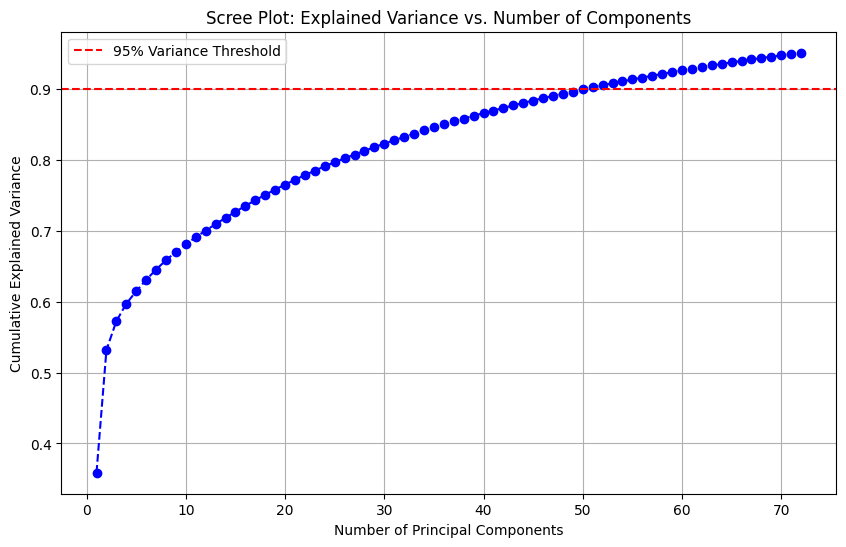

Number of components to retain for 95% variance: 72
r2 score on training set :  0.6721887796980348
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Estimator: RandomForestRegressor(ccp_alpha=0.001, max_depth=10, max_features=0.3,
                      min_samples_leaf=10, min_samples_split=5,
                      n_estimators=200, random_state=42)
r2 score on validation set : 0.4068918034835446
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 101 entries, x0 to x828
dtypes: float64(101)
memory usage: 914.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -

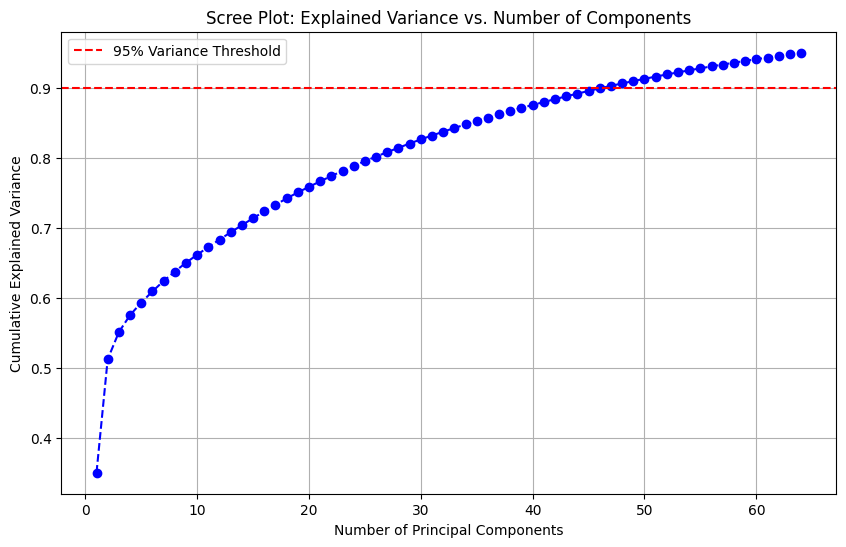

Number of components to retain for 95% variance: 64
r2 score on training set :  0.6774315288177962
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestRegressor(ccp_alpha=0.001, max_depth=10, max_features=0.3,
                      min_samples_leaf=10, min_samples_split=5,
                      random_state=42)
r2 score on validation set : 0.4269789831550762
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 149 entries, x1 to x831
dtypes: float64(149)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       

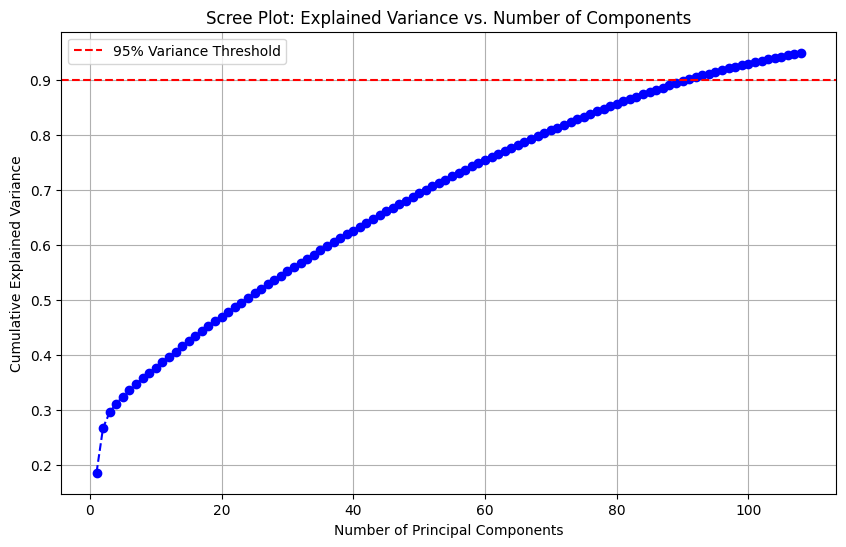

Number of components to retain for 95% variance: 108


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


r2 score on training set :  0.684177547871115
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Estimator: RandomForestRegressor(ccp_alpha=0.001, max_depth=20, max_features=0.3,
                      min_samples_leaf=10, min_samples_split=5,
                      n_estimators=500, random_state=42)
r2 score on validation set : 0.3917885622518509


In [20]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [10,15,20],
    'ccp_alpha': [0.001, 0.005]
}

train_an_ensemble(RandomForestRegressor,param_grid, X_fin_ens_arr)

{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 119 entries, x2 to x828
dtypes: float64(119)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


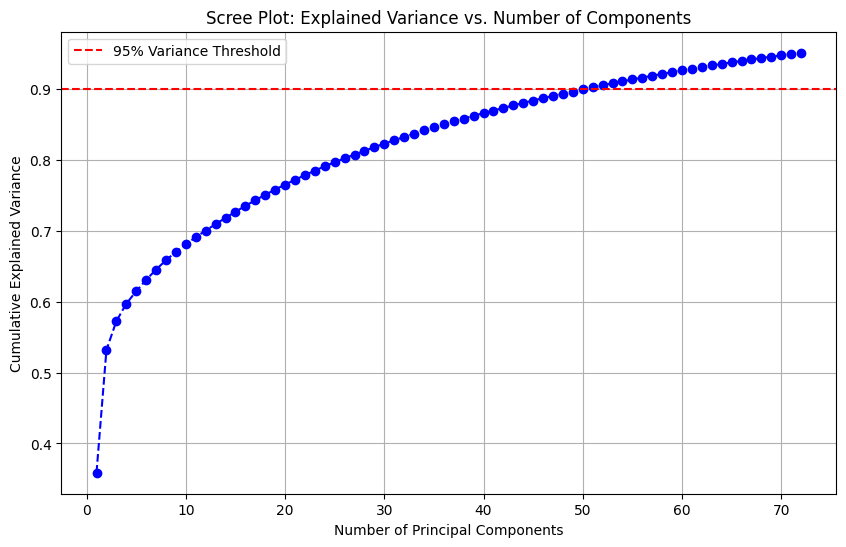

Number of components to retain for 95% variance: 72


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


r2 score on training set :  0.42122237120732553
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.005, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Estimator: ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.005, max_depth=20,
                    max_features=0.3, min_samples_leaf=10, min_samples_split=5,
                    n_estimators=200, random_state=42)
r2 score on validation set : 0.2696788116187928
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 101 entries, x0 to x828
dtypes: float64(101)
memory usage: 914.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       11

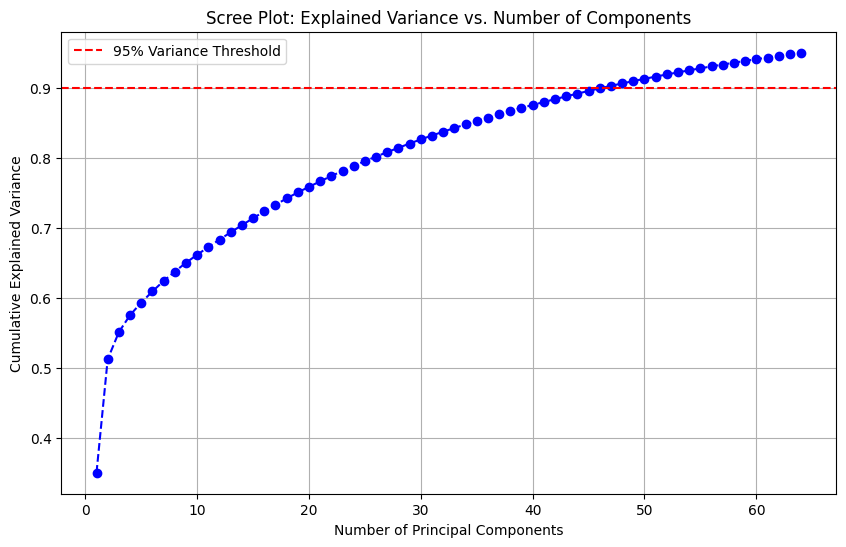

Number of components to retain for 95% variance: 64
r2 score on training set :  0.4135900553164916
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.001, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Estimator: ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.001, max_depth=20,
                    max_features=0.3, min_samples_leaf=10, min_samples_split=5,
                    n_estimators=500, random_state=42)
r2 score on validation set : 0.26185616298849523
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 149 entries, x1 to x831
dtypes: float64(149)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
--

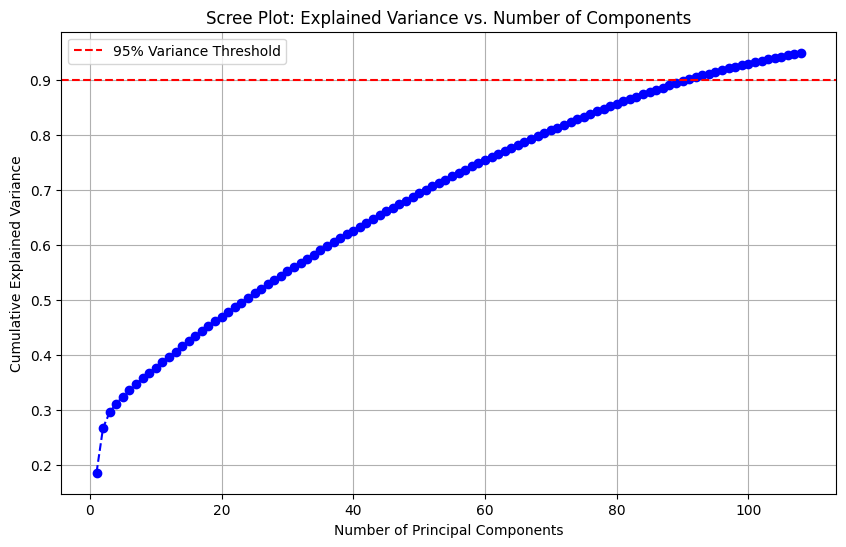

Number of components to retain for 95% variance: 108


/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


r2 score on training set :  0.4318282775581659
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.005, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Estimator: ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.005, max_depth=20,
                    max_features=0.3, min_samples_leaf=10, min_samples_split=5,
                    n_estimators=500, random_state=42)
r2 score on validation set : 0.23592084885305298


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [10,15,20],
    'ccp_alpha': [0.001, 0.005]
}

train_an_ensemble(ExtraTreesRegressor,param_grid, X_fin_ens_arr)

{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 119 entries, x2 to x828
dtypes: float64(119)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


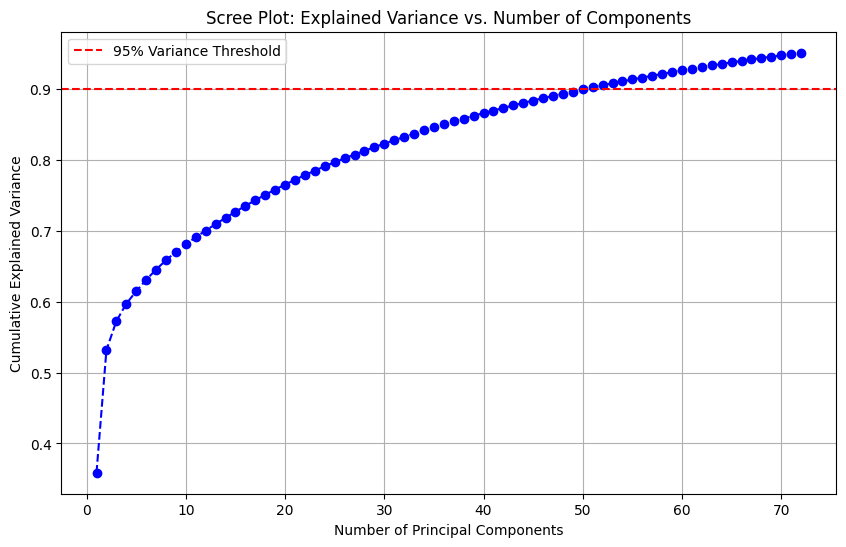

Number of components to retain for 95% variance: 72
r2 score on training set :  0.7353214353056214
Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=4), 'learning_rate': 0.5, 'n_estimators': 200}
Best Estimator: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=200, random_state=42)
r2 score on validation set : 0.4748411187561137
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 101 entries, x0 to x828
dtypes: float64(101)
memory usage: 914.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


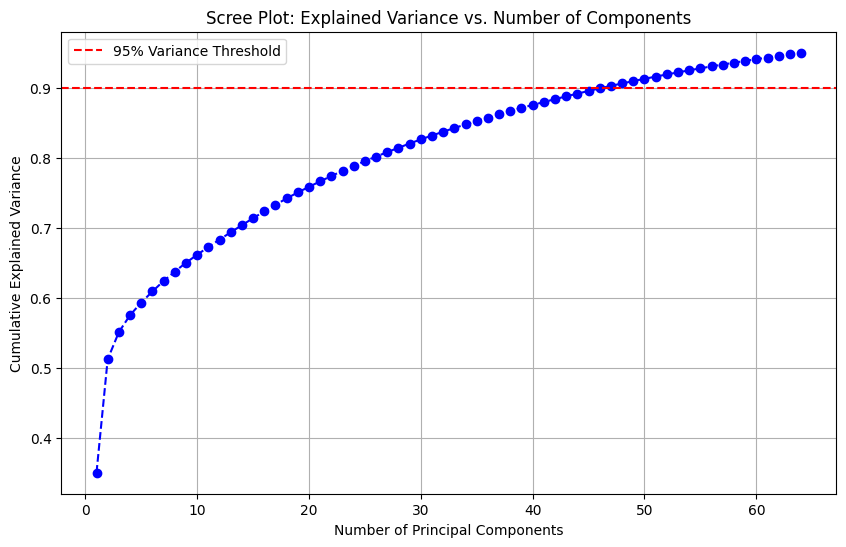

Number of components to retain for 95% variance: 64
r2 score on training set :  0.7197538418418892
Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=4), 'learning_rate': 0.5, 'n_estimators': 200}
Best Estimator: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=200, random_state=42)
r2 score on validation set : 0.4247736807158795
{'bootstrap': False, 'contamination': 0.053, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Columns: 149 entries, x1 to x831
dtypes: float64(149)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1147 entries, 0 to 1211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1147 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB
None


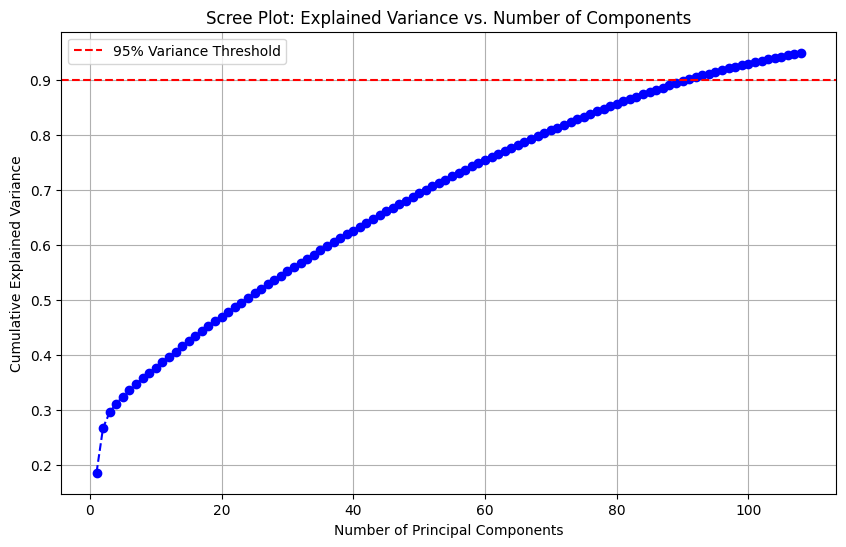

Number of components to retain for 95% variance: 108
r2 score on training set :  0.7437031400390831
Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=4), 'learning_rate': 0.5, 'n_estimators': 200}
Best Estimator: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.5, n_estimators=200, random_state=42)
r2 score on validation set : 0.4671932518054501


In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator': [
        DecisionTreeRegressor(max_depth=2),
        DecisionTreeRegressor(max_depth=4),
        LinearRegression()
    ]
}

train_an_ensemble(AdaBoostRegressor, param_grid, X_fin_ens_arr)

### __NEURAL NETWORKS__

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 69.4953 - mse: 4904.4365 - val_loss: 68.8470 - val_mse: 4810.9434
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 66.6382 - mse: 4526.8896 - val_loss: 65.6337 - val_mse: 4392.9312
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 62.0243 - mse: 3973.1809 - val_loss: 60.2147 - val_mse: 3756.7314
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 55.1517 - mse: 3231.5081 - val_loss: 52.2759 - val_mse: 2940.2542
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 47.2214 - mse: 2514.4238 - val_loss: 43.3992 - val_mse: 2181.9685
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 39.8591 - mse: 2085.9636 - val_loss: 36.4917 - val_mse: 1853.1802
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 35.9851 - mse: 2304.2217 - val_loss: 34.9829 - val_mse: 1936.2877
Epoch 8/500
10/10 [=======

<AxesSubplot:>

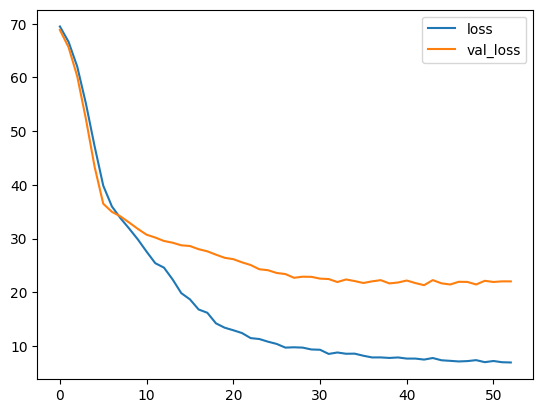

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


X = read_and_drop('X_train.csv','id',True)
y = read_and_drop('y_train.csv','id',True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NOTE: This creates the neural network, in this case it has two layers, one with 64 neurons, a dropot rate o 20% and another halved 
#       to end in a single one because of regression
neural = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1) 
])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

neural.compile(optimizer='adam', loss='mae', metrics=['mse'])
losses = neural.fit(
        X_train,y_train,
        validation_data=(X_test, y_test),
        epochs=500,
        batch_size=100,
        callbacks=[es],
        verbose=1
)

y_pred = neural.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()


## __PIPELINE__

first step is imputing data
Univariate filter feature selection
lasso feature selection
PCA reduction
y targeted denoising
stacking ridge and gradient boosting

Removed 61 outliers out of 1212 samples


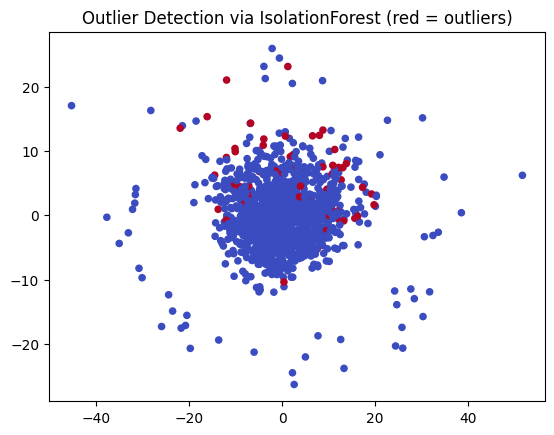

best factor is 0.3
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[420]	valid_0's l2: 33.8516
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[483]	valid_0's l2: 33.3787
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[457]	valid_0's l2: 31.0448
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[420]	valid_0's l2: 33.8516
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[483]	valid_0's l2: 33.3787
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[457]	valid_0's l2: 31.0448
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[420]	valid_0's l2: 33.8516
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[483]	valid_0's l

/home/lamberto/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Ridge           | Train R²: 0.531 | Test R²: 0.418
LightGBM        | Train R²: 0.707 | Test R²: 0.531
RandomForest    | Train R²: 0.831 | Test R²: 0.547
AdaBoost        | Train R²: 0.750 | Test R²: 0.523
Stacked         | Train R²: 0.782 | Test R²: 0.536
Train R²: 0.7820810016446699
Test  R²: 0.5356006979251298


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest, StackingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV, LassoCV, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt


def build_pipeline(X_full, y_full, tune=True):

    # NOTE: Median is not affected by outliers so is good to impuite before isolationForest
    imp_median = SimpleImputer(strategy="median")
    X_imp_median = imp_median.fit_transform(X_full)

    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_imp_median)

    pca = PCA(n_components=50, random_state=42)
    X_reduced = pca.fit_transform(X_scaled)

    # NOTE: Make outlier detection through isolationforest now on PCA Reducted
    iso = IsolationForest(contamination=0.05,
                        n_estimators=300,
                        max_samples='auto',
                        random_state=42)
    mask = iso.fit_predict(X_reduced)

    n_outliers = np.sum(mask == -1)
    print(f"Removed {n_outliers} outliers out of {len(X_full)} samples")

    X_inliers = X_full[mask == 1]
    y_inliers = y_full[mask == 1]

    # NOTE: now that outliers don't affect knn we can use it to impute datya more robustly
    imputer_knn = KNNImputer(n_neighbors=7)
    scaler_final = RobustScaler()
    X_imp = scaler_final.fit_transform(imputer_knn.fit_transform(X_inliers))
   
    # NOTE: easily imputes where values are missing with median of column and scales then features

    # NOTE: preliminary feature selection, choose features based on their correlation with the y, 
    # NOTE: makes lasso and PCA even better and faster.
    #       At least 50    
    num_corr_features = 50
    selector_corr = SelectKBest(f_regression, k=num_corr_features)
    X_corr = selector_corr.fit_transform(X_imp, y_inliers)

    pca_vis = PCA(n_components=2)
    X_vis = pca_vis.fit_transform(X_scaled)

    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=(mask == -1), cmap="coolwarm", s=20)
    plt.title("Outlier Detection via IsolationForest (red = outliers)")
    plt.show()

    # NOTE: After the preliminary feature selection, lasso is further use to selected even a better 
    #       subset of features. At least 20
    lasso = LassoCV(cv=5, max_iter=5000, random_state=42)
    lasso.fit(X_corr, y_inliers)
    mask = np.abs(lasso.coef_) > 1e-5
    if mask.sum() < 20:
        top_idx = np.argsort(-np.abs(lasso.coef_))[:20]
        mask = np.zeros_like(lasso.coef_, dtype=bool)
        mask[top_idx] = True
    X_lasso = X_corr[:, mask]

    # NOTE: Further reduce feature space by creating principal components that are able to explain most of the variance
    #       Makes features uncorrelated and lower dimensional
    pca_components = min(15, X_lasso.shape[1])
    pca = PCA(n_components=pca_components, random_state=42)
    X_pca = pca.fit_transform(X_lasso)


    # NOTE: Given the extremely noisy data, we can furthermore try to reduce it by acting on the y
    # NOTE: Basically we predict y target from the X_pca and then we reduce variuance by the extreme noisy points in y
    ridge_denoise = Ridge(alpha=1.0)
    ridge_denoise.fit(X_pca, y_inliers)
    y_pred_pc = ridge_denoise.predict(X_pca)

    best_r2 = -np.inf
    best_factor = 0.5
    for f in np.linspace(0.1, 0.3, 9):
        y_denoised = y_inliers - (y_inliers - y_pred_pc) * f
        X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y_denoised, test_size=0.2, random_state=42)
        ridge_cv = RidgeCV(alphas=np.logspace(-3,3,7), cv=5)
        ridge_cv.fit(X_tr, y_tr)
        r2 = r2_score(y_te, ridge_cv.predict(X_te))
        if r2 > best_r2:
            best_r2 = r2
            best_factor = f

    print(f'best factor is {best_factor}')
    y_denoised = y_inliers - (y_inliers - y_pred_pc) * best_factor

    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_denoised, test_size=0.2, random_state=42)


    # NOTE: Apply ridgeCrpossval which works very very well for PCA components, 
    ridge_grid = {'alphas':[np.logspace(-4,4,9)]}
    ridge_final = GridSearchCV(RidgeCV(), ridge_grid, cv=5)
    ridge_final.fit(X_train, y_train)


    # NOTE gradientBoosting veryvery good for capturing non-linearity
    lgb_params = dict(
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        max_depth=6,
        min_child_samples=20,
        subsample=0.7,
        colsample_bytree=0.6,
        reg_alpha=1.0,
        reg_lambda=2.0,
        random_state=42,
        n_jobs=-1,
        verbose=-1 
    )
    lgb_grid = {
        'num_leaves':[16,32,64],
        'max_depth':[4,6,8],
        'learning_rate':[0.01,0.02,0.05],
    }
    lgbm = GridSearchCV(lgb.LGBMRegressor(**lgb_params), lgb_grid, cv=3)
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    lgbm.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
    )

    rf_grid = {'max_depth':[8,10,12],'min_samples_leaf':[5,10,15],'max_features':[0.3,0.5,0.7]}
    rf = GridSearchCV(RandomForestRegressor(n_estimators=300, random_state=42), rf_grid, cv=3)
    rf.fit(X_train, y_train)

    ab_grid = {'learning_rate':[0.3,0.5,0.7],'n_estimators':[100,200,300]}
    ab = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=42), ab_grid, cv=3)
    ab.fit(X_train, y_train)

    # NOTE: Apply stacking
    estimators = [
        ('ridge', ridge_final),
        ('lgbm', lgbm),
        ('rf', rf),
        ('ada', ab)
    ]

    meta_model = RidgeCV(alphas=np.logspace(-3,3,7), cv=5)
    stacked = StackingRegressor(estimators=estimators, final_estimator=meta_model, n_jobs=-1)
    stacked.fit(X_train, y_train)
    y_pred_stack_train = stacked.predict(X_train)
    y_pred_stack_test = stacked.predict(X_test)


    # NOTE: simple printing formality for a general overview of the different R2
    models = {
        "Ridge": ridge_final,
        "LightGBM": lgbm,
        "RandomForest": rf,
        "AdaBoost": ab,
        "Stacked": stacked
    }

    for name, model in models.items():
        print(f"{name:15s} | Train R²: {r2_score(y_train, model.predict(X_train)):.3f} | "
            f"Test R²: {r2_score(y_test, model.predict(X_test)):.3f}")

    def predict_fn(X_new):
        X_proc_new  = imputer_knn.transform(X_new)
        X_scaled    = scaler.transform(X_proc_new)
        X_corr_new  = selector_corr.transform(X_scaled)
        X_lasso_new = X_corr_new[:, mask]
        X_pca_new   = pca.transform(X_lasso_new)

        return stacked.predict(X_pca_new)

    return {
        'imputer': imputer_knn,
        'scaler': scaler,
        'selector_corr': selector_corr,
        'lasso_mask': mask,
        'pca': pca,
        'ridge_denoise': ridge_denoise,
        'ridge': ridge_final,
        'lgbm': lgbm,
        'best_shrink_factor': best_factor,
        'predict': predict_fn,
        'X_train': X_train,
        'y_train': y_train,
        'y_train_pred': y_pred_stack_train,
        'X_test': X_test,
        'y_test': y_test,
        'y_test_pred': y_pred_stack_test
    }

# NOTE: build pipeline and seee results
X_full = pd.read_csv("X_train.csv").drop('id', axis=1).to_numpy()
y_full = pd.read_csv("y_train.csv").drop('id', axis=1).squeeze().to_numpy()

pipeline = build_pipeline(X_full, y_full,True)

print("Train R²:", r2_score(pipeline['y_train'], pipeline['y_train_pred']))
print("Test  R²:", r2_score(pipeline['y_test'], pipeline['y_test_pred']))


## __TEST MODEL ON UNSEEN DATA AND CREATE SUBMISSION FILE__

In [21]:
X_new_df = pd.read_csv("X_test.csv")  
ids = X_new_df['id'].to_numpy()
X_new = X_new_df.drop('id', axis=1).to_numpy()

y_pred_new = pipeline['predict'](X_new)

submission_df = pd.DataFrame({
    'id': ids,
    'y': y_pred_new
})

submission_df.to_csv("submission4.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


In [25]:
import csv

file1 = "submission3.csv"
file2 = "submission4.csv"

with open(file1) as f1, open(file2) as f2:
    reader1 = csv.reader(f1)
    reader2 = csv.reader(f2)
    
    # Skip header
    header1 = next(reader1)
    header2 = next(reader2)
    
    print(f"{header1[0]:<5} {header1[1]:<20} {'Difference':<20}")
    
    for row1, row2 in zip(reader1, reader2):
        id1, y1 = row1
        id2, y2 = row2
        # Convert to float
        y1 = float(y1)
        y2 = float(y2)
        diff = abs(y1 - y2)
        print(f"{id1:<5} {y1:<20} {diff:<20}")


id    y                    Difference          
0.0   63.51071061808574    0.9896039753757151  
1.0   75.66313396505176    0.724995302429079   
2.0   73.48486670737682    2.9011969622676332  
3.0   71.93664542344038    0.5841370046621108  
4.0   71.90987800624852    1.2839571013796984  
5.0   62.93268776018323    0.5405978189396876  
6.0   64.1614370248661     2.7712969398664455  
7.0   68.74529252643245    0.11158327370834797 
8.0   67.34012461398491    2.0652233623727057  
9.0   62.26206422523538    0.698041577826487   
10.0  73.62121213591536    2.8270147241869807  
11.0  75.34728956195897    0.80582291684739    
12.0  60.067234612184606   1.6121136458103393  
13.0  70.78276355954759    0.7239441021261825  
14.0  74.34624530105711    0.8019778017625185  
15.0  67.54070506181004    0.49711702493745236 
16.0  74.1490134708356     2.3370265873715965  
17.0  69.04614911275893    0.7509706397105873  
18.0  67.23300276312405    1.2384280862013526  
19.0  62.14613841010805    0.28836889522